In [1]:
import numpy as np
import pathlib
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cleaned_data_path = pathlib.Path("../data/interim/ctg_cleaned_manually.xlsx")

In [3]:
data = pd.read_excel(cleaned_data_path,header=0)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Min       2126 non-null   int64
 1   Max       2126 non-null   int64
 2   Nmax      2126 non-null   int64
 3   Nzeros    2126 non-null   int64
 4   Mode      2126 non-null   int64
 5   Mean      2126 non-null   int64
 6   Median    2126 non-null   int64
 7   Variance  2126 non-null   int64
 8   Tendency  2126 non-null   int64
 9   A         2126 non-null   int64
 10  B         2126 non-null   int64
 11  C         2126 non-null   int64
 12  D         2126 non-null   int64
 13  E         2126 non-null   int64
 14  AD        2126 non-null   int64
 15  DE        2126 non-null   int64
 16  LD        2126 non-null   int64
 17  FS        2126 non-null   int64
 18  SUSP      2126 non-null   int64
 19  CLASS     2126 non-null   int64
 20  NSP       2126 non-null   int64
dtypes: int64(21)
memory usage: 348.9 KB


In [5]:
x_raw = data.loc[:, "Min":"SUSP"]
y_raw = data.loc[:, "CLASS":"NSP"]

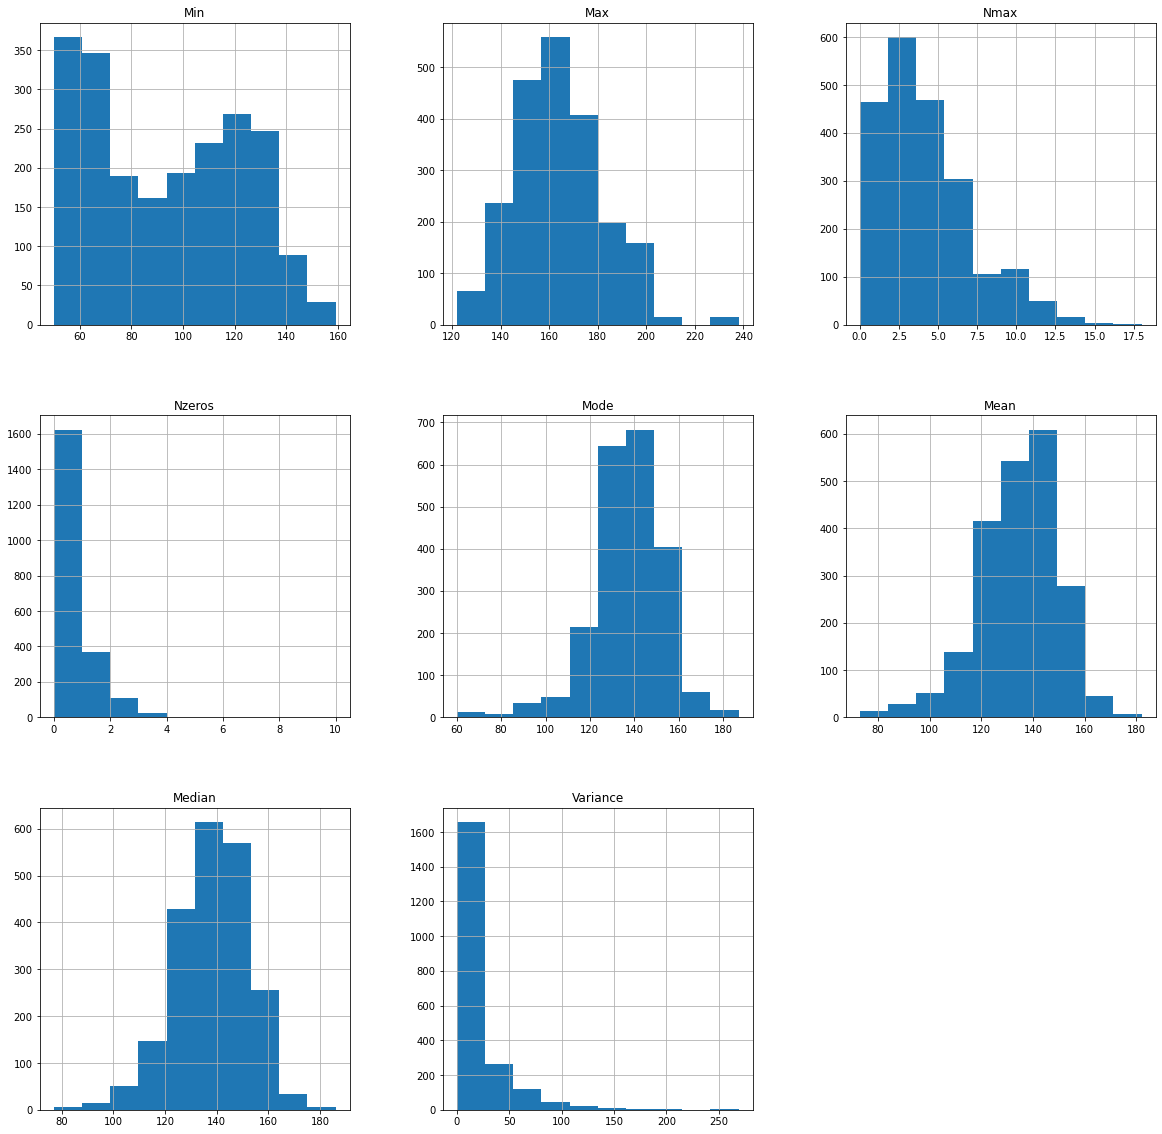

In [6]:
_ = x_raw.loc[:, "Min":"Variance"].hist(figsize=(20,20))

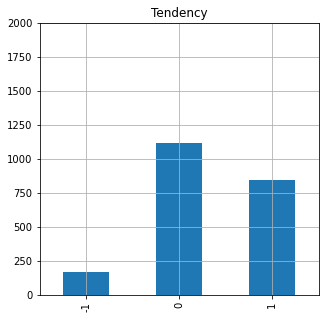

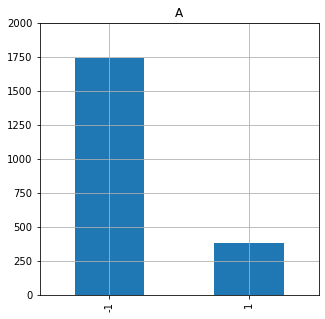

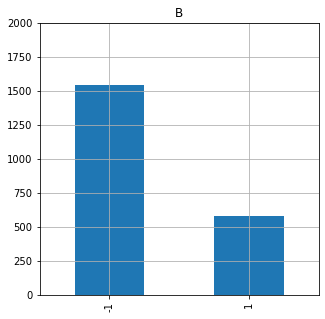

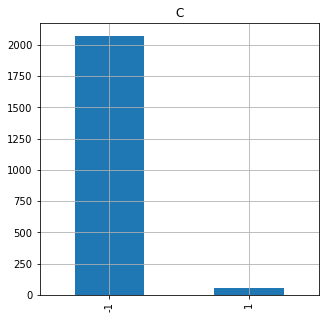

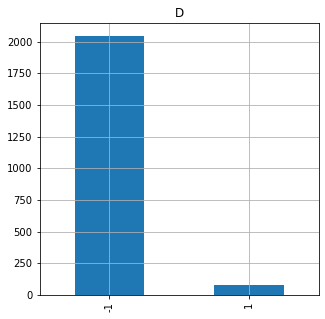

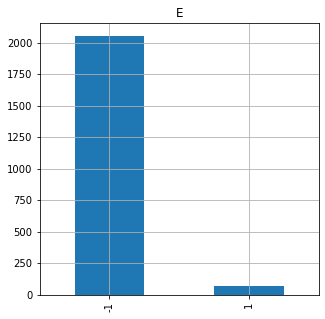

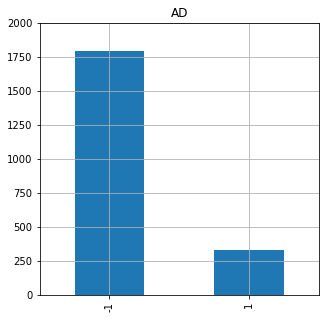

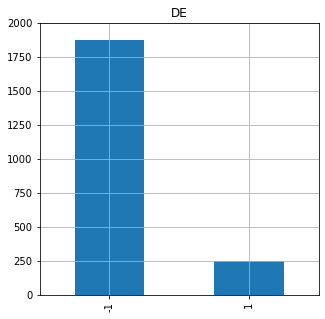

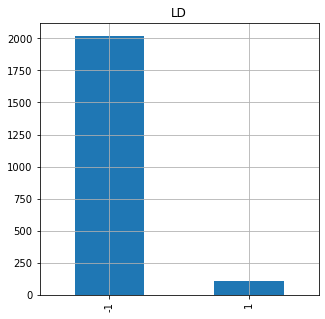

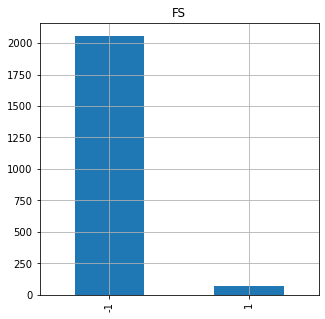

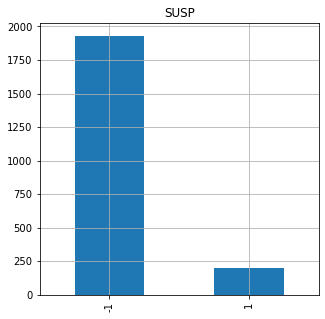

In [15]:
for column in x_raw.loc[:, "Tendency":"SUSP"].columns:
    x_raw[column].value_counts().sort_index().plot(kind="bar",figsize=(5,5),title=column,yticks=range(0,2200,250),grid="major")
    plt.show()

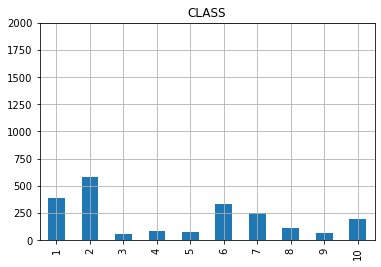

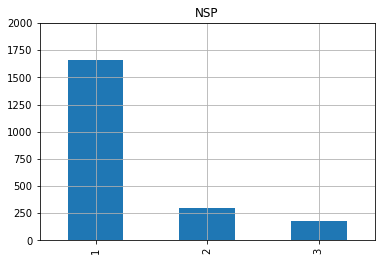

In [17]:
for column in y_raw.columns:
    y_raw[column].value_counts().sort_index().plot(kind="bar",title=column,yticks=range(0,2200,250),grid="major")
    plt.show()

<AxesSubplot:>

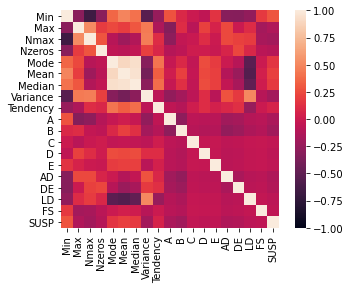

In [9]:
corr = x_raw.corr()
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,vmin=-1,vmax=1,square=True,)